<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/Notebooks/assignments/assignment1-solution-py-nomads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json
import datetime as dt

In [ ]:
people = pd.read_csv('https://github.com/SDS-AAU/M1-2018/raw/master/assignments/assignment_1/data/people_df.tsv', '\t')

In [ ]:
trips = pd.read_csv('https://github.com/SDS-AAU/M1-2018/raw/master/assignments/assignment_1/data/trips_df.tsv', '\t')

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46510 entries, 0 to 46509
Data columns (total 11 columns):
Unnamed: 0      46510 non-null int64
username        46510 non-null object
country         46473 non-null object
country_code    45909 non-null object
country_slug    46473 non-null object
date_end        46335 non-null object
date_start      46510 non-null object
latitude        46510 non-null int64
longitude       46510 non-null int64
place           46510 non-null object
place_slug      46473 non-null object
dtypes: int64(3), object(8)
memory usage: 3.9+ MB


In [ ]:
trips = trips[['username', 'country', 'country_code', 'country_slug',
       'date_end', 'date_start', 'latitude', 'longitude', 'place',
       'place_slug']]

In [ ]:
trips.to_csv('trips.csv')

In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 10 columns):
Unnamed: 0    4016 non-null int64
education     451 non-null object
like          816 non-null object
username      4016 non-null object
work          1582 non-null object
edu_str       451 non-null object
cities        4016 non-null int64
countries     4016 non-null int64
followers     4016 non-null int64
following     4016 non-null int64
dtypes: int64(5), object(5)
memory usage: 313.8+ KB


In [ ]:
countrylist = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

# Cut out the alpha-2 iso and the region columns
countrylist = countrylist[['alpha-2','region','sub-region']]

In [ ]:
countrylist.to_csv('countrylist.csv', index=False)

In [ ]:
countrylist

,alpha-2,region,sub-region
0,AF,Asia,Southern Asia
1,AX,Europe,Northern Europe
2,AL,Europe,Southern Europe
3,DZ,Africa,Northern Africa
4,AS,Oceania,Polynesia
5,AD,Europe,Southern Europe
6,AO,Africa,Sub-Saharan Africa
7,AI,Americas,Latin America and the Caribbean
8,AQ,NaN,NaN
9,AG,Americas,Latin America and the Caribbean


In [ ]:
people['education'] = people['education'].str.replace("\'High School\'",'"High School"')
people['work'] = people['work'].str.replace("'",'"')

In [ ]:
def load_json(x):
  try:
    return json.loads(x)
  except TypeError:
    return None

In [ ]:
def joiner(x):
  try:
    return ', '.join(x)
  except TypeError:
    return None

In [ ]:
people.work = list(map(load_json, people.work))
people.education = list(map(load_json, people.education))
people['work_raw'] = list(map(joiner, people.work))
people['education_raw'] = list(map(joiner, people.education))

In [ ]:
people.columns

Index(['Unnamed: 0', 'education', 'like', 'username', 'work', 'edu_str',
       'cities', 'countries', 'followers', 'following', 'work_raw',
       'education_raw'],
      dtype='object')

In [ ]:
col = ['username', 'followers', 'following', 'work_raw','education_raw']

In [ ]:
people = people[col]

In [ ]:
people.to_csv('people.csv')

In [ ]:
people.head()

,username,followers,following,work_raw,education_raw
0,@lewellenmichael,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
1,@waylandchin,0,2,None,None
2,@karan,2,1,None,None
3,@skaboss217,0,1,None,None
4,@apwn,17,426,Web Dev,None


In [ ]:
trips['date_start'] = pd.to_datetime(trips.date_start, errors='coerce')
trips['date_end'] = pd.to_datetime(trips.date_end, errors='coerce')

In [ ]:
trips['duration'] = trips.date_end - trips.date_start

In [ ]:
trips

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug
0,0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico
1,1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico
2,2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico
3,3,@lewellenmichael,Jordan,JO,jordan,2017-08-07,2017-07-24,31,35,Amman,amman-jordan
4,4,@waylandchin,China,CN,china,2017-03-18,2017-02-17,40,122,Yingkou,china


In [ ]:
# Median stay
trips['duration'].median()

Timedelta('7 days 00:00:00')

In [ ]:
trips['duration'].describe()

count                       46282
mean      50 days 13:04:52.312346
std      658 days 14:15:01.267546
min         -16831 days +00:00:00
25%               3 days 00:00:00
50%               7 days 00:00:00
75%              23 days 00:00:00
max           74633 days 00:00:00
Name: duration, dtype: object

In [ ]:
trips = trips.merge(countrylist, how='left', left_on='country_code', right_on='alpha-2')

In [ ]:
trips = trips[(trips['duration'] >= trips['duration'].quantile(0.1)) & (trips['duration'] < trips['duration'].quantile(0.95))]

In [ ]:
trips = trips[(trips['date_start'] >= trips['date_start'].quantile(0.1)) & (trips['date_start'] < trips['date_start'].quantile(0.99))]

In [ ]:
people['software_dev'] = people.work_raw.str.contains('Software Dev')

In [ ]:
people['software_dev'].fillna(False, inplace=True)

In [ ]:
people


,Unnamed: 0,education,like,username,work,edu_str,cities,countries,followers,following
0,0,"['High School', ""Bachelor's Degree""]","['Waking up early', 'Cats', 'Dogs', 'Tea', 'Co...",@lewellenmichael,"['Software Dev', 'Startup Founder', 'Finance',...","High School, Bachelor's Degree",4,2,1,2
1,1,NaN,NaN,@waylandchin,NaN,NaN,9,6,0,2
2,2,NaN,NaN,@karan,NaN,NaN,14,5,2,1
3,3,NaN,NaN,@skaboss217,NaN,NaN,1,1,0,1
4,4,NaN,NaN,@apwn,['Web Dev'],NaN,0,0,17,426
5,5,NaN,NaN,@samcalma,NaN,NaN,0,0,3,3
6,6,NaN,NaN,@paulbremer,NaN,NaN,25,9,4,9
7,7,"['High School', ""Bachelor's Degree"", ""Master's...","['Waking up early', 'Staying up late', 'Cats',...",@jtompl,"['Web Dev', 'Software Dev', 'Startup Founder',...","High School, Bachelor's Degree, Master's Degree",15,6,2,3
8,8,NaN,NaN,@jezfx,NaN,NaN,3,3,17,23
9,9,NaN,NaN,@markcaggiano,NaN,NaN,0,0,2,2


In [ ]:
trips = trips.merge(people[['username','software_dev']], how='left', on='username')

In [ ]:
trips.columns

Index(['Unnamed: 0', 'username', 'country', 'country_code', 'country_slug',
       'date_end', 'date_start', 'latitude', 'longitude', 'place',
       'place_slug', 'duration', 'software_dev'],
      dtype='object')

In [ ]:
trips.duration

0       11 days
1        3 days
2        4 days
3       14 days
4       29 days
5       30 days
6        2 days
7       28 days
8       30 days
9       12 days
10      33 days
11      60 days
12      92 days
13      29 days
14       2 days
15       1 days
16       1 days
17       4 days
18       4 days
19       1 days
20       3 days
21       2 days
22       5 days
23       6 days
24       8 days
25       8 days
26       3 days
27       4 days
28       8 days
29       2 days
          ...  
37701   31 days
37702   16 days
37703   32 days
37704   56 days
37705   11 days
37706   31 days
37707   18 days
37708    6 days
37709   64 days
37710   29 days
37711   21 days
37712   31 days
37713    3 days
37714    7 days
37715    6 days
37716   26 days
37717   31 days
37718   14 days
37719    2 days
37720    2 days
37721   31 days
37722   30 days
37723    3 days
37724   93 days
37725   28 days
37726    6 days
37727   20 days
37728   22 days
37729    7 days
37730   27 days
Name: duration, Length: 

In [ ]:
trips.groupby('software_dev')['duration_days'].mean()

software_dev
False    15.456589
True     14.156038
Name: duration_days, dtype: float64

In [ ]:
trips.head()

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,duration,software_dev,duration_days,alpha-2,region,sub-region
0,0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico,11 days,True,11,MX,Americas,Latin America and the Caribbean
1,1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico,3 days,True,3,MX,Americas,Latin America and the Caribbean
2,2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico,4 days,True,4,MX,Americas,Latin America and the Caribbean
3,3,@lewellenmichael,Jordan,JO,jordan,2017-08-07,2017-07-24,31,35,Amman,amman-jordan,14 days,True,14,JO,Asia,Western Asia
4,4,@waylandchin,China,CN,china,2017-03-18,2017-02-17,40,122,Yingkou,china,29 days,False,29,CN,Asia,Eastern Asia


In [ ]:
trips.set_index('date_start', inplace=True)

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41369 entries, 2018-06-04 to 2018-01-12
Data columns (total 10 columns):
Unnamed: 0      41369 non-null int64
username        41369 non-null object
country         41338 non-null object
country_code    40845 non-null object
country_slug    41338 non-null object
date_end        41168 non-null datetime64[ns]
latitude        41369 non-null int64
longitude       41369 non-null int64
place           41369 non-null object
place_slug      41338 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.5+ MB


In [ ]:
trips.date_start.dt.day

0         4.0
1        31.0
2         1.0
3        24.0
4        17.0
5         2.0
6         2.0
7        31.0
8         3.0
9         3.0
10       22.0
11       19.0
12       14.0
13       15.0
14        1.0
15       29.0
16       29.0
17       28.0
18       25.0
19       24.0
20       23.0
21       27.0
22       22.0
23       16.0
24       17.0
25        7.0
26       27.0
27       24.0
28       20.0
29       28.0
         ... 
46480    14.0
46481     1.0
46482    24.0
46483     7.0
46484     1.0
46485    20.0
46486    30.0
46487    24.0
46488    16.0
46489     8.0
46490     1.0
46491     5.0
46492     1.0
46493    17.0
46494    14.0
46495     9.0
46496     4.0
46497    15.0
46498    14.0
46499    14.0
46500    27.0
46501     6.0
46502    17.0
46503    13.0
46504     7.0
46505    19.0
46506    28.0
46507     4.0
46508    12.0
46509    12.0
Name: date_start, Length: 46510, dtype: float64

In [ ]:
trips[trips.date_start.dt.year == 2017].country.value_counts(ascending=False)

United States          1902
Thailand                910
United Kingdom          644
Spain                   619
Germany                 488
France                  408
Indonesia               379
Vietnam                 363
Mexico                  326
Netherlands             315
Portugal                314
Italy                   308
Malaysia                295
Australia               261
Japan                   252
Canada                  248
China                   241
Colombia                196
India                   177
Brazil                  174
Singapore               157
Russia                  153
Hungary                 140
New Zealand             139
Taiwan                  136
Poland                  133
Sweden                  124
Greece                  118
Croatia                 114
Austria                 113
                       ... 
Pakistan                  1
Angola                    1
Reunion                   1
Tonga                     1
Macedonia           

In [ ]:
trips[trips['sub-region'] == 'Eastern Asia'].groupby(['country'])['duration_days'].median().sort_values(ascending=False)

country
Hong Kong      18.5
Taiwan         15.0
South Korea    10.0
Mongolia        9.0
Japan           6.0
China           5.0
North Korea     3.0
Name: duration_days, dtype: float64

In [ ]:
trips.set_index('date_start', inplace=True)

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37731 entries, 2018-06-04 to 2018-01-12
Data columns (total 14 columns):
Unnamed: 0      37731 non-null int64
username        37731 non-null object
country         37704 non-null object
country_code    37276 non-null object
country_slug    37704 non-null object
date_end        37731 non-null datetime64[ns]
latitude        37731 non-null int64
longitude       37731 non-null int64
place           37731 non-null object
place_slug      37704 non-null object
duration        37731 non-null timedelta64[ns]
alpha-2         35819 non-null object
region          36274 non-null object
sub-region      36274 non-null object
dtypes: datetime64[ns](1), int64(3), object(9), timedelta64[ns](1)
memory usage: 4.3+ MB


In [ ]:
p = pd.DataFrame(.region.value_counts())

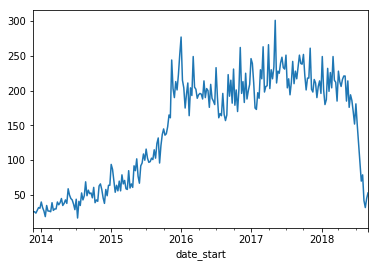

In [ ]:
trips.resample('W').region.count().plot()